### ANOVA(Analysis of variance)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datafile = "Dataset/PlantGrowth.csv"
data = pd.read_csv(datafile)

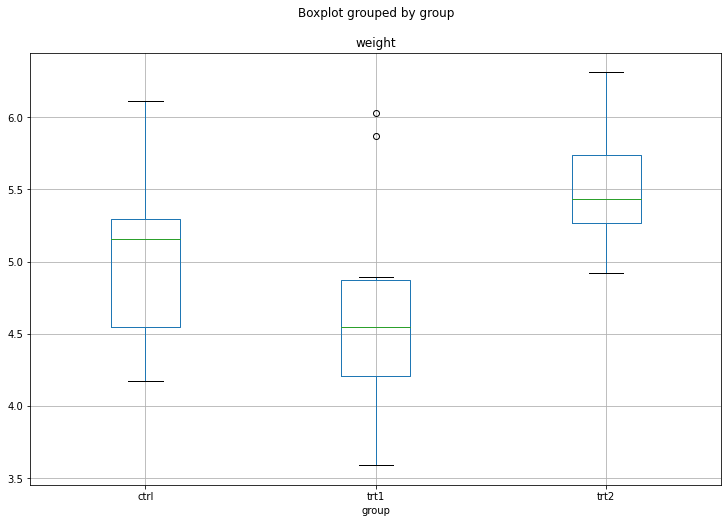

In [12]:
data.boxplot('weight',by='group',figsize=(12,8))
plt.show()
ctrl = data['weight'][data.group == 'ctrl']
grps = pd.unique(data.group.values)
d_data={grp:data['weight'][data.group==grp] for grp in grps}
k = len(pd.unique(data.group))
N = len(data.values)
n = data.groupby('group').size()[0]

In [17]:
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


### ANOVA Test

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
mod = ols('weight ~ group', data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


### Tukey's Test

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data['weight'],data['group'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------
['ctrl' 'trt1' 'trt2']
